In [458]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
sns.set()

import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [136]:
def makeLegend(dates):       
    legend = ""
    event = dates['Event']
    begin = dates['Start']
    end = dates['Finish']
    for i in range(0,len(event)):
        if(len(legend) != 0):
            legend += '\n'
        if(length[i] == 0):
            legend += '{}: {}'.format(begin[i], event[i])
        else:
            legend += '{:3}-{:3}: {}'.format(begin[i], end[i], event[i])
    return legend
makeLegend(dates)

'632: Mort du prophète Mahomet\n750-1258: Abbasid Caliphate\n1250-1517: Abbasid Mamluks\n1492: Fin de la Reconquista\n1206: Genghis Khan'

In [449]:
importantColor = '1'
relevantColor = '2'
otherColor = '0'

In [444]:
def make_dates(datesArray):
    dates = pd.DataFrame(datesArray, columns=['Event', 'Start', 'Finish','VerticalLineStyle'])
    dates = dates.sort_values(by=['Start'])
    dates = dates.reset_index(drop=True)
    
    return dates

In [453]:
dates750 = make_dates([
        ['Mort du prophète Mahomet', 632, 632, relevantColor], 
        ['Califat Abbasid', 750, 1258, importantColor],
        ['Abbasid Mamluks', 1250, 1517, otherColor],
        ['Fin de la Reconquista', 1492, 1492, relevantColor], 
        ['Proclamation de Genghis Khan', 1206, 1206, relevantColor]
    ])
dates750

,Event,Start,Finish,VerticalLineStyle
0,Mort du prophète Mahomet,632,632,2
1,Califat Abbasid,750,1258,1
2,Proclamation de Genghis Khan,1206,1206,2
3,Abbasid Mamluks,1250,1517,0
4,Fin de la Reconquista,1492,1492,2


In [451]:
dates1492 = make_dates([
        ['Mort du prophète Mahomet', 632, 632, relevantColor],
        ['Fin de la Reconquista', 1492, 1492, importantColor]
    ])
dates1492

,Event,Start,Finish,VerticalLineStyle
0,Mort du prophète Mahomet,632,632,2
1,Fin de la Reconquista,1492,1492,1


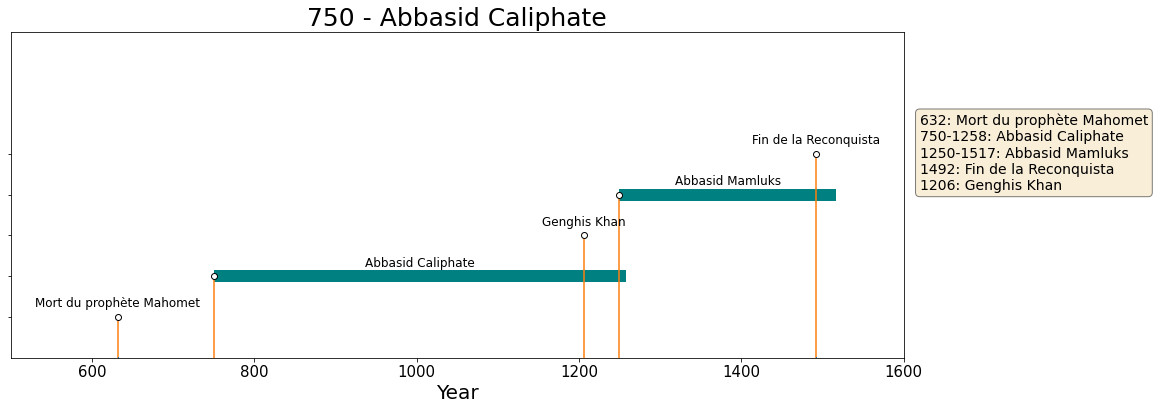

In [184]:
event = dates['Event']
begin = dates['Start']
end = dates['Finish']
length =  dates['Finish'] - dates['Start']


plt.figure(figsize=(16,6))
plt.barh(range(len(begin)), (end-begin), .3, left=begin, color="teal")
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.title('750 - Califat Abbasid', fontsize = '25')
plt.xlabel('Year', fontsize = '20')
plt.yticks(range(len(event)), "")
leftDate = np.amin(begin) - (np.amin(begin) % 100) - 100
rightDate = np.amax(end) - (np.amax(end) % 100) + 100
plt.xlim(leftDate, rightDate)
plt.ylim(-1,len(event)+2)
for i in range(len(event)):
    plt.text(begin.iloc[i] + length.iloc[i]/2,  i+.25, event.iloc[i], ha='center', fontsize = '12')
    
markerline, stemline, baseline = plt.stem(begin, [0,1,2,3,4], linefmt="C1-", basefmt=",", use_line_collection=True, bottom=-1)


plt.setp(markerline, mec="k", mfc="w", zorder=3)

legend = makeLegend(dates)
        
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

with HiddenPrints():
    plt.text(rightDate+20, len(dates), legend, fontsize=14, verticalalignment='top', bbox=props)


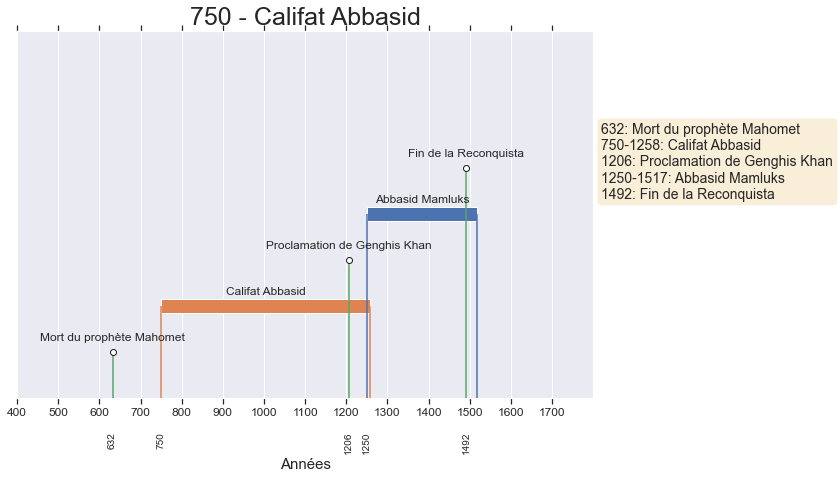

In [464]:
def DrawTimeline(dates, title):
    event = dates['Event']
    begin = dates['Start']
    end = dates['Finish']
    verticalLineStyle = dates['VerticalLineStyle']
    length =  dates['Finish'] - dates['Start']


    fig = plt.figure(figsize=(16,6))


    # Axes
    ax = fig.add_axes( [.05, .1, 0.5, .85] )
    ax.set_yticks( [] )
    ax.set_ylim(-1,len(event)+2)
    leftDate = np.amin(begin) - (np.amin(begin) % 100) - 200
    rightDate = np.amax(end) - (np.amax(end) % 100) + 300
    ax.set_xlim(leftDate, rightDate)
    ax.set_ylim(-1,len(event)+2)
    minor = begin
    major = np.arange(leftDate,rightDate,100)
    ax.set_xticks( major )
    ax.set_xticks( minor, minor=True )
    ax.set_xticklabels( major )
    ax.set_xticklabels( minor, minor=True )

    for text in ax.get_xminorticklabels():
        text.set_rotation(90)

    ax.tick_params( axis='x', which='minor', direction='out', length=30 )
    ax.tick_params( axis='x', which='major', bottom='off', top='off' ) 

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=10)
    colorCycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors = []
    for i in range(len(event)):
        if begin[i] == end[i]:
            colors.append('black')
        else:
            colors.append(colorCycle[int(verticalLineStyle[i])])


    bars = plt.barh(range(len(begin)), (end-begin), .3, left=begin, color=colors)
    plt.title(title, fontsize = '25')
    plt.xlabel('Années', fontsize = '15')

    vindex = 0
    for i in range(len(event)):
        linefmt = "C{:}-".format(verticalLineStyle[i])
        if begin[i] == end[i]:
            barDates = [begin[i]]
            markerline, stemline, baseline =plt.stem(barDates, [vindex], linefmt=linefmt, basefmt=",", use_line_collection=True, bottom=-1)
            plt.setp(markerline, mec="k", mfc="w", zorder=3)

        else:
            barDates = [begin[i],end[i]]
            markerline, stemline, baseline =plt.stem(barDates, [vindex,vindex], linefmt=linefmt, basefmt=",", use_line_collection=True, bottom=-1)
            plt.setp(markerline, mec="none", mfc="none", zorder=3)

        #plt.setp(markerline, 'color', plt.getp(stemline,'color'))  
        vindex += 1

    for i in range(len(event)):
        plt.text(begin.iloc[i] + length.iloc[i]/2,  i+.25, event.iloc[i], ha='center', fontsize = '12')


    legend = makeLegend(dates)

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    with HiddenPrints():
        plt.text(rightDate+20, len(dates), legend, fontsize=14, verticalalignment='top', bbox=props)

        
#DrawTimeline(dates1492, '1492 - La reconquista')
DrawTimeline(dates750, '750 - Califat Abbasid')
